# What makes a competent software engineer?

words and more words

In [131]:
import pandas as pd
import numpy 

In [147]:
# pull in data!
from sqlalchemy import create_engine
engine = create_engine('sqlite:////Users/rachel/projects/eng_survey_raw/results.db')
with engine.connect() as conn, conn.begin():
    eng_traits_data = pd.read_sql_table('q1_competent_software_engineer_traits', conn)
    education_data = pd.read_sql_table('q21q24_education', conn)
    setup_questions_data = pd.read_sql_table('q3q6_setup_questions', conn)

In [112]:
# plot related shenanigans
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 20)
plt.rcParams['font.family'] = 'sans-serif'

# Do people with CS degrees value the same things as non-CS degrees?

An interesting way to slice this data is by people who have CS degrees vs. people who do not. 


In [22]:
excluded_trait_columns = ('id', 'response_id', 'something_else_writein1', 'something_else_writein2')
eng_traits = [trait for trait in list(eng_traits_data.columns.values) if trait not in excluded_trait_columns]

In [82]:
# get data series for all software engineers with/without CS degrees. 
edu_traits_data = pd.merge(eng_traits_data, education_data[["response_id", "have_cs_degree"]], on="response_id", sort=False)


edu_traits_engineers_only_data = pd.merge(edu_traits_data, on="response_id", sort=False)

In [61]:
traits_data = pd.pivot_table(edu_traits_data, index=["have_cs_degree"], values=eng_traits)

## What do we value the most?

If you sort by the top 10 traits valued by both groups, 9 out of 10 are the same, with the top 5 being exactly the same and in the same order. 

Interestingly, there's only one true technical skill on both lists, and it's the 1 out of 10 that disagreed: people with CS degrees value rated data structures higher and people without rated knowing code structure styles, e.g. object-oriented, functional, MVC, DCI, etc higher. 

All the other skills are primarily social, e.g. teamwork, empathy, curiousity, humility, or technically social:  fluent in both reading other people's code and writing for them, and making tradeoffs, which implies one understands the dynamics of the situation.

In [83]:
traits_data.stack()['Yes, computer science'].sort_values(ascending=False)[:10]

logically_work_through_problem     0.945860
write_code_for_others              0.942675
reason_about_other_peoples_code    0.917197
can_admit_mistakes                 0.863057
teamwork                           0.856688
shipping_code                      0.821656
data_structures                    0.792994
empathy                            0.786624
curiousity                         0.780255
can_make_tradeoffs                 0.767516
dtype: float64

In [84]:
traits_data.stack()['No'].sort_values(ascending=False)[:10]

logically_work_through_problem     0.941003
write_code_for_others              0.920354
reason_about_other_peoples_code    0.890855
can_admit_mistakes                 0.870206
teamwork                           0.864307
curiousity                         0.831858
empathy                            0.817109
can_make_tradeoffs                 0.796460
shipping_code                      0.778761
code_structure_skills              0.716814
dtype: float64

## What do we disagree about?

The next interesting question is: are there traits each group values more than the other? 

TODO: should we change this to be by raw numbers instead of comparing percentages? idk

In [139]:
traits_by_degree = traits_data.transpose().filter(['Yes, computer science', 'No'])
traits_difference = traits_by_degree.apply(lambda row: (row['Yes, computer science'] - row['No']) * 100,axis=1)

traits_std_dev = numpy.std(traits_difference)
traits_mean = numpy.mean(traits_difference)
traits_std_dev, traits_mean

(6.14481142430055, 1.819774273412739)

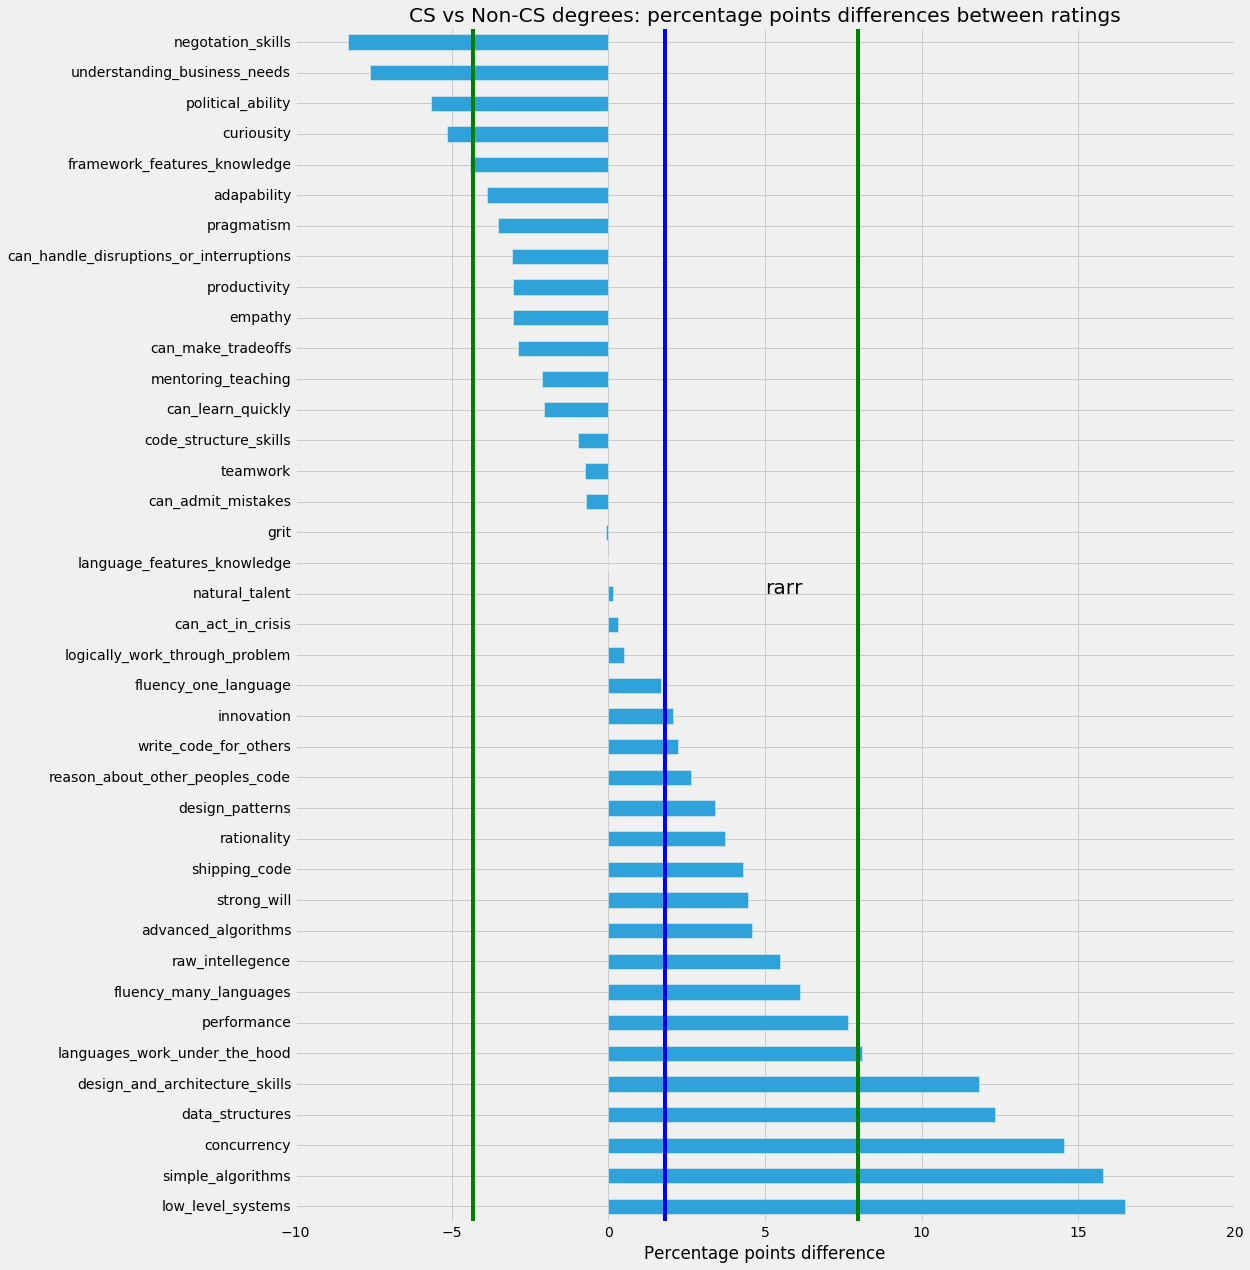

In [149]:
trait_plot = traits_difference.sort_values(ascending=False).plot(kind='barh')
trait_plot.set_title('CS vs Non-CS degrees: percentage points differences between ratings')
trait_plot.set_xlabel('Percentage points difference')

trait_plot.axvline(traits_mean, color='b')
trait_plot.axvline(traits_mean - traits_std_dev, color='g')
trait_plot.axvline(traits_mean + traits_std_dev, color='g')

plt.show()

TODO: might want to limit this to just software engineers?